# Linear Regression with Python Scikit Learn

# Author: T Anas Ahmed

https://www.linkedin.com/in/t-anas-ahmed-thirukulacheri-70b440154/

# TASK 1: Prediction using Supervised Machine Learning (GRIP - The Sparks Foundation)

This is a simple linear regression task with two variables where we are have to successfully train and built a model that could accurately predict the percentage of a student based on the number of hours they study. 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Importing the Dataset

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(5)       #printing first 5 rows

# Data Preprocessing 

In [20]:
print(df.describe())   #getting the description of the data
print()
print(df.dtypes)
print()
print(df.isnull().sum())   #Checking for null Values

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000

Hours     float64
Scores      int64
dtype: object

Hours     0
Scores    0
dtype: int64


So now as we can see there are no null values/missing value, we can now proceed to check whether the variables have any outlier values or not.

Text(0.5,1,'Scores Boxplot')

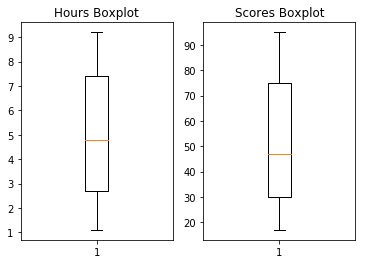

In [35]:
plt.subplot(1,2,1)
plt.boxplot(x = df['Hours'])
plt.title('Hours Boxplot')
plt.subplot(1,2,2)
plt.boxplot(x = df['Scores'])
plt.title('Scores Boxplot')

# Plotting the data : Scores vs Hours


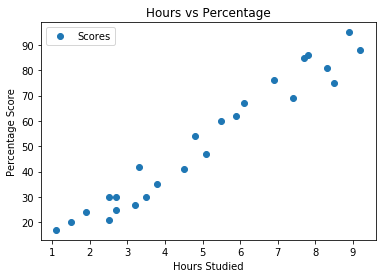

In [39]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph we can see there is positive relationship between number of hours studied and percentage.

# Preparing the train and test data

In [40]:
x = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

Dividing the data into training and testing part. (80% training data, 20% testing data)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Training the algorithm

In [72]:
lm = LinearRegression()  
lm.fit(x_train, y_train) 

print("Training complete.")

Training complete.


The Simple Linear Regression Equation is : b1*X + b0
b1 = Coefficient Term
b0 = Intercept 

With b1 and b0 we can find Y for any given X.

Printing the coefficient and Intercept Term

In [74]:
print(lm.intercept_)
print(lm.coef_)  

1.9894231109746912
[9.83544438]


# Plotting the regression line.

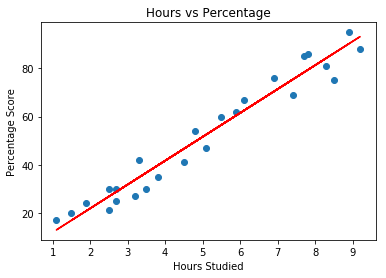

In [75]:
line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.plot(x, line, color='Red');
plt.show()

# Testing the algorithm

Now that we have trained our model on training data. We will testing it on the testing data, for this we would be doing predictions on the testing datapoints and comparing it with the actual values and then perform model evaluation to see how well the model is performing.

In [76]:
y_pred = lm.predict(x_test)
print(y_pred)


[28.54512294 39.36411177 34.44638957 60.01854497 16.74258969]


In [77]:
new_df = pd.DataFrame()
new_df['Actual Scores'] = y_test
new_df['Predicted Scores'] = y_pred
new_df

,Actual Scores,Predicted Scores
0,25,28.545123
1,35,39.364112
2,42,34.446390
3,62,60.018545
4,20,16.742590


# Evaluating the model

The final step is to evaluate the mdoel, for this we will use mean square and mean absolute error for evaluation.

In [80]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score = r2_score(y_test,y_pred)
print('R-squared Value: ', r2_score)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('Mean Squared Error: ', rmse)

R-squared Value:  0.9050356232459791
Mean Squared Error:  4.543287018366107


Predicting for given value : 9.5 hours study / day

In [88]:
X1 = 9.5

prediction = lm.predict(X1)
print("No. of hours of study : ", X1)
print("Predicted Score : ", round(float(prediction),2))

No. of hours of study :  9.5
Predicted Score :  95.43
